<a href="https://colab.research.google.com/github/aneetat1/NASA-SEES-Internship/blob/main/Aneeta_Thokkadam_SEES_5_Simulated_Disk_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aneeta Thokkadam, Climate Disaster Preparedness (O-CD), 07/01/2022 ⭐**

# Andromeda, here we come! (Notebook 5)

In this activity, you are going to simulate the disk of Andromeda! 

You'll begin with a different step than what is shown in the UCSC ***Session3A_Notebook5.mp4*** video. The steps are similar to what you have seen before while reading in the star text (*.txt*) files. The difference in this case is that your code imports another module name *sys* and uses it to tell your notebook where to look for the ***fakedisk.py*** file on Google Drive. This file is kept in the sip_program folder. **IMPORTANT:** Check to see that your MyDrive folder contains the sip_program folder, which in turns contains the fakedisk.py file. If you don't see the fiolder and file, return to the **#1: Start Here** section of the Classroom and review B. Getting setup in the Google Colaboratory.

*fakedisk* is the program that will generate the simulated disk mentioned in the title of this notebook.

*.py* files are Python scripts, collection of code in the Python language, just like the lines of code that you are running in notebook code cells. If you are curious, you can open ***fakedisk.py*** in a text editor (or a Python editor) to see what the script does and how it is written. Just be careful not to change anything when you do that.

#Setup Google Drive access for data input and output

*The following code blocks are not mentioned or used in the PyaR tutorial.*

We use the same code presented at the beginning of Notebooks 3 and 4. Here we have combined some of the statements for brevity.



In [ ]:
# Step 1 - Mounting the Google Drive. User will need to give access to their 
#          Google drive for reading/writing data
from google.colab import drive
drive.mount('/content/drive')
# import the os.path package for path name construction
from os import path as path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Prepare for Python module import

Use the following steps to verify the full path to the sip_program folder. This is similar to what you did when preparing to read the sip_data text files.

1.   Highlight your sip_program folder
2.   Click the three vertical dots that appear at right
3.   Choose the option to *Copy path*


In [ ]:
# here is the standard path if your placed the sip_program folder as directed

py_dir = '/content/drive/MyDrive/sip_data'
print("My path to the sip_program folder is {}".format(py_dir))

My path to the sip_program folder is /content/drive/MyDrive/sip_data


## Import a stand-alone Python file

 

1.  First, we import a standard Python module named *sys*.
2.  Next, we use a special command to inform Python where to look for the stand-alone *fakedisk* Python program in order to use it as a package in our code.
3.  Finally, we import fakedisk as a Python module.


  



In [ ]:
import sys
sys.path.insert(0, py_dir)
from fakedisk import fakedisk


Continue in the next code cell, as in previous notebooks, by importing the other key programs. *matplotlib* and *numpy* should be familar to you at this point.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The following routine makes a plot of the simulated disk. Run this cell. Remember - since the cell creates a new function, *show_map*, you won't see any output.

In [ ]:
def show_map(sim, quantity, label, vmin=-200, vmax=200, cutout=False): 
    ax = plt.axes(aspect = 'equal')
    
    ax.set_xlabel('xi (kpc)') ##xi and eta are coordinate centers centered on Andromeda
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Simulation')
    ax.set_xlim(1.2 * max(sim.x), 1.2 * min(sim.x))

    if cutout:
        #clip into "mystery cutout" 
        sideL  = 0.25 * sim.scaleFactor
        ax.set_xlim(sideL, -sideL)
        ax.set_ylim(-sideL, sideL)  ##this zooms it in
        
    tt = ax.scatter(sim.x, sim.z, c=quantity, edgecolors='none', s=2, vmin=vmin, vmax=vmax)

    plt.colorbar(tt, label = label)

Now, we'd like to create our fake disk! This occurs below when the program *fakedisk* is called. 

Again - no output after you run the next code cell. Do you understand why?

In [ ]:
scale_factor = 20. #Scale length of the disk
dispersion = 100.    #Dispersion in the layer, changing how coherent the motion of stars is
incl=77. #Inclination 0 = face on, 90 = edge on
pa0=37.7 #Position Angle; measured from vertical counter clockwise
vrot=200. #rotation velocity
n=30000 #number of particles/stars
new_sim = fakedisk(N=n, incl=incl, pa0=pa0, v=vrot, scaleFactor=scale_factor, shape='constant',
               dispersion=dispersion)


## Why is there no output after you run the preceding code block? (Intermediate Level)

**There is no output after running the preceding code block because in the code, we are only setting new_sim to a new fakedisk with certain parameters**

## Generate plots of your simulated velocity field below. 

Once you've made these plots, go back and change the following parameters to see what they mean.
Think about what happens when you change:
*   the scale factor: **scale length of the disk**
*   The dispersion: **how well the stars are moving together (how coherent they are)**
*   The inclination (incl): **inclination of the galaxy (whether it is head on or edge on)**
*   The position angle (pa0): **measured from vertical counter clockwise**
*   N?: **number of particles on the plot**

Can you guess what these different parameters are referring to? 

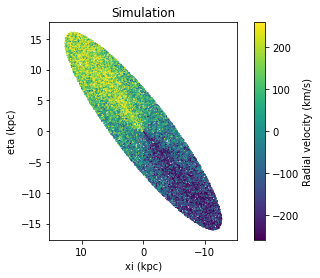

In [ ]:
#Generate velocity map
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax)

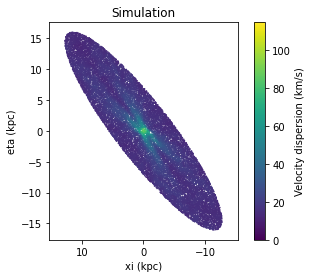

In [ ]:
#Generate dispersion map using 200'' smoothing circle.
arcsec2kpc = (13.67/3600.) #conversion factor
sigma = np.zeros(len(new_sim.x))
sig_sv = np.zeros(len(new_sim.x))
smoothingCircle = 200. * arcsec2kpc
for i in range(len(sigma)):
    sigma[i], sig_sv[i] = new_sim.get_sv(i, smoothingCircle)
show_map(new_sim, sigma, 'Velocity dispersion (km/s)', vmin=0, vmax=1.3*np.max(sigma))

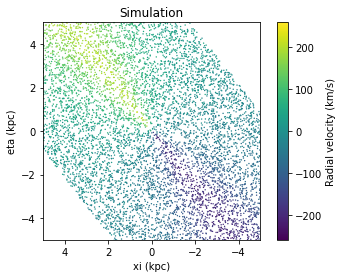

In [ ]:
#Also generate a little square cutout velocity map.
vmax = 1.3 * new_sim.vrot
show_map(new_sim, new_sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax, cutout=True)

Now that you're familiar with the parameters and the figures, change the parameters for *fakedisk* to answer the following questions. 

## ATTENTION! (For Intermediate Level credit)
*For the purposes of SEES Lesson 2, getting the astronomy answers right is not crucial. It's more important that you understand how to adjust code variables and parameters to explore research questions. However, we do ask that you attempt answers*

You can double click on this cell and type your answers below the questions:

1) If galaxies A and B have the same geometry, but galaxy A has twice the rotation speed of galaxy B, how do the velocity fields differ on the major axis? On the minor axis? In between?

> **The stars of the galaxy B will be moving more coherently because it has a greater rotation velocity. The major axis is more coordinated in terms of the colors of the particles on the plot, and almost all the neighboring stars are of the same color. One the other hand, the major axis of galaxy A is less coordinated and many neighboring particles are of different colors. The same is true for the minor axis. In between, there is a greater mix of different-colored particles for galaxy A since it has a lower rotation velocity.**

2) If galaxies C and D have the same PA and rotation speed, but galaxy C has an inclination half that of D, how do the velocity fields differ?

> **The velocity field of galaxy C is more circular in shape rather than elliptical. This is because its lower inclination makes its view appear to be head-on rather than from a better angle. The actual shape of the galaxy is elliptical, but since the inclination is lower, it looks circular since you're looking at it from above. For the specific galaxy we're working with in this notebook, an inclination of 77 is the best for an elliptical shape.**

3) If galaxies E and F have the same inclination and rotation speed, but galaxy E’s major axis position angle is the negative of galaxy F’s, how do the velocity fields differ?

> **The velocity field of galaxy E would have a positive slope whereas the velocity field of galaxy F would have a negative slope.**




### The following questions are thought experiments. Answer if inspired...
What PA, inclination, velocity, and/or disk radius would make it easiest to study the properties of a real galaxy? 

> **PA: 37.7**
**Inclination: 77**
**Disk radius: 10**

What parameters most closely reproduce M31‘s velocity map that you made last time?

> 


# Preparing for the Basic Level Certificate

After you have attempted to run the notebook, watched the assigned videos, and possibly rerun the notebook, take the quiz to complete the requirements for Notebook 5.

We encourage you to complete the notebook and submit it as part of the Intermediate Level Certificate. You've got this!

# Preparing for the Intermediate Level Certificate
When you have successfully completed the code that plots the requested maps, you can prepare this notebook for submission. Also be sure to answer questions asked in the appropriate text cells. Your answers demonstrate that you've attempted to interpret the science data. They will not be scored.

Add a new text cell to the very top of your notebook. Write your **full name**, your **team code**, your specific **team name** and the **date** in the text block.

Make sure that your saved notebook shows your output by running all code cells. Your notebook is already located in the *Your work* area for this assignment.

Turn in your notebook in the Google Classroom.

# CREDIT: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](http://ucsc-sip.org/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2022 SEES.   